In [1]:
# Demo of paper: Women Wearing Lipstick: Measuring the Bias Between Object and Its related Gender
# Note that the result may differ from the paper as we used distill models so it can run on the notebook.

In [2]:
%%capture --no-display
!pip install sentence_transformers

In [3]:
from lm_scorer.models.auto import AutoLMScorer as LMScorer
from sentence_transformers import SentenceTransformer, util

In [4]:
%%capture --no-display
#device = "cuda:0" if torch.cuda.is_available() else "cpu"
device='cpu'
model = SentenceTransformer('stsb-distilbert-base',device=device)
batch_size = 1
scorer = LMScorer.from_pretrained('distilgpt2', device=device, batch_size=batch_size)

In [6]:
def get_sim(x):
    x = cosine_scores_man = x.item()
    return x

In [7]:
class Gender_Bias_Score:
  def __init__(self, LM, visual_context_prob, sim):
    self.LM = LM
    self.visual_context_prob = visual_context_prob
    self.sim = sim

  def belief_revision(self):
    score = pow(float(LM), pow((1 - float(sim)) / (1 + float(sim)), 1 - float(visual_context_prob)))
    return score

In [8]:
# Aappendix - Gender score for short text (Twitter)   
# Twitter example from the appendix
# Example 1 

In [9]:
# language model (hyp init) inspired by cloze probability
# cloze probability is the probability of the target word completing that particular sentence 
#frame (last word in this example).
twitter_exp_1 = 'do you believe in time travel'
#context = 'travel
# here is inpsired by cloze probabitity --> to get the score of the gender 
man_twitter_context = 'This tweet was written by a man' 
woman_twitter_context ='This tweet was written by a woman'
LM_man_tw  = scorer.sentence_score(man_twitter_context, reduce="mean")
LM_woman_tw  = scorer.sentence_score(woman_twitter_context, reduce="mean")

In [10]:
# The Context (we used BERT-keyword extractor to know where the context in the sentence)
#%%capture --no-display
from keybert import KeyBERT

In [11]:
context_1 = twitter_exp_1
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(context_1)
print(keywords)

[('travel', 0.3843), ('time', 0.3364), ('believe', 0.3059)]


In [12]:
# Here is the actual cloze prob of the last word (context) or any part of the sentence as a word completion task.
from lm_scorer.models.get_cloze_prob import cloze_prob
cloze_pro_tw_1 = cloze_prob(twitter_exp_1)
print(cloze_pro_tw_1)
cloze_prob_tw_1 = 0.007473638234702438

do you believe in time travel 0.007473638234702438
nothing more important to me than my family 0.012680305235560454
0.007473638234702438


In [13]:
# Cosine Distance (similarity) 
caption_emb_man_tw = model.encode(man_twitter_context, convert_to_tensor=True)
caption_emb_woman_tw = model.encode(woman_twitter_context, convert_to_tensor=True)

context_tw_emb = model.encode(twitter_exp_1, convert_to_tensor=True)

cosine_scores_man_tw = util.pytorch_cos_sim(caption_emb_man_tw, context_tw_emb)
cosine_scores_woman_tw = util.pytorch_cos_sim(caption_emb_woman_tw, context_tw_emb)

cosine_scores_man_tw = cosine_scores_man_tw.cpu().numpy()
print('man_cosine', get_sim(cosine_scores_man_tw))

cosine_scores_woman_tw = cosine_scores_woman_tw.cpu().numpy()
print('woman_cosine', get_sim(cosine_scores_woman_tw))

man_cosine 0.09434470534324646
woman_cosine 0.07362435013055801


In [14]:
# man score 
sim = 0.07669414 #cosine_scores_man_tw
LM = 0.13498122990131378 #LM_man_tw 
visual_context_prob = context_prob = 0.007473638234702438
score_man =  Gender_Bias_Score(LM, visual_context_prob ,sim)
score = score_man.belief_revision()
print ('man-travel',score)

man-travel 0.17919233858267355


In [15]:
# woman score 
sim =0.03379764 #cosine_scores_woman_tw
LM = 0.12978363037109375 #LM_woman_tw 
visual_context_prob = context_prob = 0.007473638234702438
score_woman_exp_2 =  Gender_Bias_Score(LM, visual_context_prob, sim)
score = score_woman_exp_2 .belief_revision()
print ('woman-travel',score)

woman-travel 0.1481779000512469


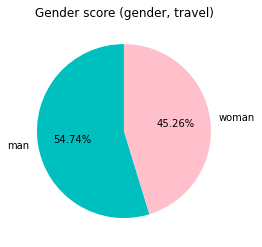

In [16]:
#Gender Score 
import matplotlib.pyplot as plt

labels = 'man', 'woman'
sections = ['0.17919233858267355', '0.1481779000512469']
colors = ['c', 'pink']

plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        #explode = (0, 0.1),
        autopct = '%1.2f%%')
plt.title('Gender score (gender, travel)')
plt.show()

In [17]:
# Example 2

In [18]:
twitter_exp_2 = 'nothing more important to me than my family'

context_2 = twitter_exp_2
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(context_2)
print(keywords)
context = 'family'
man_twitter_context = 'This tweet was written by a man' 
woman_twitter_context ='This tweet was written by a woman'
#prob of the context

[('family', 0.6), ('important', 0.351)]


In [19]:
cloze_pro_tw_2 = cloze_prob(twitter_exp_2)
print(cloze_pro_tw_2)
cloze_prob_tw_2 = 0.012680305235560454

0.012680305235560454


In [20]:
# Cosine Distance (similarity) 
caption_emb_man_tw = model.encode(man_twitter_context, convert_to_tensor=True)
caption_emb_woman_tw = model.encode(woman_twitter_context, convert_to_tensor=True)

context_tw_emb = model.encode(twitter_exp_2, convert_to_tensor=True)

cosine_scores_man_tw = util.pytorch_cos_sim(caption_emb_man_tw, context_tw_emb)
cosine_scores_woman_tw = util.pytorch_cos_sim(caption_emb_woman_tw, context_tw_emb)

cosine_scores_man_tw = cosine_scores_man_tw.cpu().numpy()
print('man_cosine', get_sim(cosine_scores_man_tw))

cosine_scores_woman_tw = cosine_scores_woman_tw.cpu().numpy()
print('woman_cosine', get_sim(cosine_scores_woman_tw))

man_cosine -0.002708311192691326
woman_cosine 0.08113729953765869


In [21]:
# man score 
sim =-0.00270831 #cosine_scores_man_tw
LM = 0.13498122990131378  #LM_man_tw 
visual_context_prob = context_prob = 0.012680305235560454
score_man =  Gender_Bias_Score(LM, visual_context_prob ,sim)
score = score_man.belief_revision()
print ('man-family',score)

man-family 0.13353947610614106


In [22]:
# woman score 
sim =0.09729651 #cosine_scores_man_tw
LM = 0.12978363037109375 #LM_woman_tw 
visual_context_prob = context_prob = 0.012680305235560454

score_woman_exp_2 =  Gender_Bias_Score(LM, visual_context_prob, sim)
score = score_woman_exp_2 .belief_revision()
print ('woman-family',score)

woman-family 0.1856402788977767


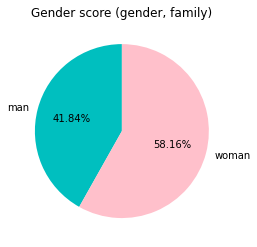

In [23]:
# Gender Score
import matplotlib.pyplot as plt

labels = 'man', 'woman'
sections = ['0.13353947610614106', '0.1856402788977767']
colors = ['c', 'pink']

plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        autopct = '%1.2f%%')
plt.title('Gender score (gender, family)')
plt.show()